In [13]:
%matplotlib inline
%autoreload 2

In [14]:
from __future__ import print_function
import numpy as np 
import george
from george import kernels
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import triangle
from IPython.html.widgets import interact

In [15]:
import sample_and_fit_gp as sam
import diag_plots as dplot

In [19]:
data = np.genfromtxt('../data/convergence_grid_ng32.txt', 
                     comments='#')

Should subset data since computation is slow on my laptop 

In [20]:
np.std(data)

0.014087743568028201

<matplotlib.colorbar.Colorbar instance at 0x10ba55638>

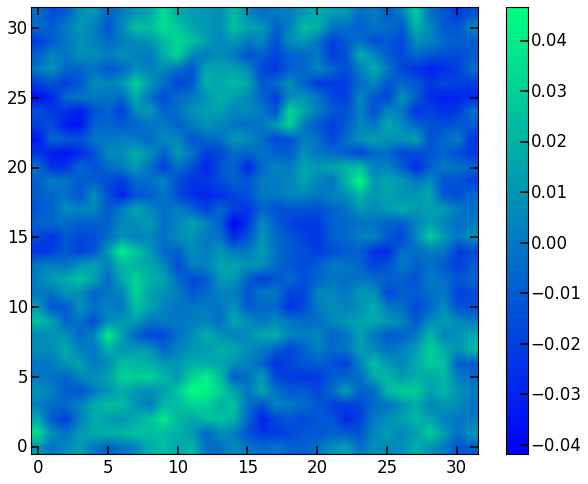

In [18]:
plt.imshow(data, origin='lower', cmap=plt.cm.winter)
plt.colorbar()

# initialize normalized spatial coordinates

In [20]:
coords = np.array([[i, j] for i in np.linspace(0, 1, data.shape[0])
                  for j in np.linspace(0, 1, data.shape[1])])

# add some gaussian error terms to the data

(array([   6.,   30.,  113.,  195.,  248.,  215.,  135.,   56.,   19.,    7.]),
 array([-0.04173654, -0.03290191, -0.02406727, -0.01523264, -0.006398  ,
         0.00243663,  0.01127126,  0.0201059 ,  0.02894053,  0.03777517,
         0.0466098 ]),
 <a list of 10 Patch objects>)

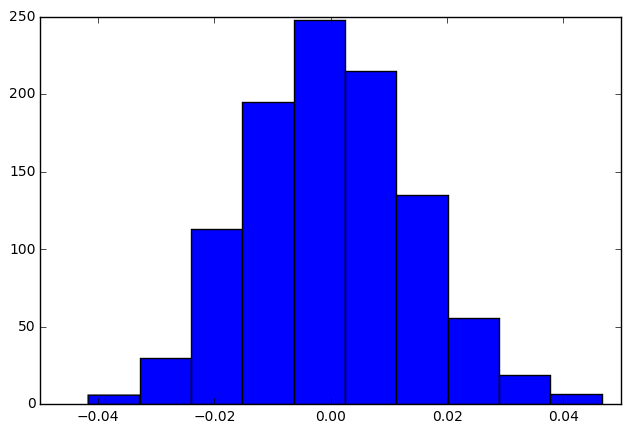

In [41]:
plt.hist(data.ravel())

In [43]:
?np.random.randn

In [49]:
noise = 0.04 * 0.001 * np.random.randn(32, 32)

In [50]:
data += noise

# try guessing the initial starting param values by using George's built in function

In [51]:
#guess0 = [3.0, 2.]
gp = george.GP(kernels.ExpSquaredKernel(1, ndim=2.),
               mean=np.mean(data))
gp.compute(coords, 1e-6)

In [52]:
data

array([[ 0.01004987, -0.00206642,  0.00620299, ...,  0.00121501,
        -0.01230417, -0.00964935],
       [ 0.03461248,  0.00641736, -0.00186293, ...,  0.01281984,
        -0.00277628,  0.01035383],
       [ 0.01605547, -0.01065613, -0.01952625, ...,  0.00269181,
        -0.00179279,  0.00079458],
       ..., 
       [-0.02148766, -0.01019003, -0.00171673, ..., -0.00484654,
        -0.00879873, -0.00932711],
       [-0.0046626 , -0.0097832 ,  0.00164948, ..., -0.01130513,
        -0.01282592,  0.00473606],
       [-0.00295158, -0.01567498, -0.01037179, ..., -0.01157595,
        -0.02215967, -0.01389511]])

In [53]:
(initial_guess, opt_param) = gp.optimize(coords, data.ravel())
print(opt_param)

LinAlgError: 23-th leading minor not positive definite

In [12]:
initial_guess = np.log(opt_param["x"])
lnprior_vals = [[-10, 10], [-10, 10]]

In [ ]:
initial_guess

array([ 0.09404783, -0.36651292])

In [ ]:
sampler, p0 = sam.fit_gp(initial_guess, data.ravel().copy(), 
                         guess_dev_frac=1e-1,
                         nwalkers=4)  